In [81]:
import numpy as np
from sklearn.preprocessing import StandardScaler
import pandas as pd
from numpy import ndarray
from matplotlib import pyplot as plt

Чтобы выполнить понижение размерности методом PCA необходимо последовательно выполнить следующие действия.

1. Стандартизация данных (итерируемся по столбцам, от каждого элемента столбца отнимаем среднее по столбцу и делим на отклонение столбца - то, что делает StandartScaller).
2. Вычисление ковариационной матрицы.
3. Вычисление собственных векторов и собственных значений ковариационной матрицы.
4. Сортировка пар <собственное значение, собственный вектор> по убыванию.
5. Выбор первых k пар <собственное значение, собственный вектор>, где k - размерность целевого пространства.
6. Матрица, составленная из k собственных векторов - матрица преобразования из данного пространства в пространство с размерностью k.
7. Чтобы произвести понижение размерности необходимо умножить матрицу стандартизированных входных данных (результат пункта 1) на матрицу из k собственных векторов (результат пункта 6).

In [82]:
data = pd.read_csv("/Users/max/projects/machine-learning-labs/data/csgo_task.csv")
data.drop_duplicates(inplace=True)
data.dropna(inplace=True)
data['bomb_planted'] = (~data['bomb_planted']).astype(np.byte)
data_new = pd.get_dummies(data, columns=['map'])
data_new

,time_left,ct_score,t_score,bomb_planted,ct_health,t_health,ct_armor,t_armor,ct_money,t_money,...,ct_players_alive,t_players_alive,map_de_cache,map_de_dust2,map_de_inferno,map_de_mirage,map_de_nuke,map_de_overpass,map_de_train,map_de_vertigo
0,175.00,0.0,0.0,1,500.0,500.0,0.0,0.0,4000.0,4000.0,...,5.0,5.0,False,True,False,False,False,False,False,False
1,156.03,0.0,0.0,1,500.0,500.0,400.0,300.0,600.0,650.0,...,5.0,5.0,False,True,False,False,False,False,False,False
2,96.03,0.0,0.0,1,391.0,400.0,294.0,200.0,750.0,500.0,...,4.0,4.0,False,True,False,False,False,False,False,False
3,76.03,0.0,0.0,1,391.0,400.0,294.0,200.0,750.0,500.0,...,4.0,4.0,False,True,False,False,False,False,False,False
4,174.97,1.0,0.0,1,500.0,500.0,192.0,0.0,18350.0,10750.0,...,5.0,5.0,False,True,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122405,15.41,11.0,14.0,0,200.0,242.0,195.0,359.0,100.0,5950.0,...,2.0,4.0,False,False,False,False,False,False,True,False
122406,174.93,11.0,15.0,1,500.0,500.0,95.0,175.0,11500.0,23900.0,...,5.0,5.0,False,False,False,False,False,False,True,False
122407,114.93,11.0,15.0,1,500.0,500.0,495.0,475.0,1200.0,6700.0,...,5.0,5.0,False,False,False,False,False,False,True,False
122408,94.93,11.0,15.0,1,500.0,500.0,495.0,475.0,1200.0,6700.0,...,5.0,5.0,False,False,False,False,False,False,True,False


In [83]:
X = data_new.drop(['bomb_planted'], axis=1)
y = data_new['bomb_planted']

In [84]:
def normilizeData(X):
    return (X - np.mean(X, axis=0)) / np.std(X, axis=0)

In [85]:
def computeCovMatrix(X):
    return np.cov(X, rowvar=False)

In [86]:
def computeEigenValuesAndVectors(cov_matrix):
    return np.linalg.eig(cov_matrix)

In [87]:
def sortEigenVectors(eigenvalues,eigenvectors ):
    np.argsort(eigenvalues)[::-1]
    eigen_indices = np.argsort(eigenvalues)[::-1]
    sorted_eigenvectors = eigenvectors[:, eigen_indices]
    return sorted_eigenvectors,eigen_indices


In [88]:
def getKFeatures(sorted_eigenvectors, k):
    return sorted_eigenvectors[:, : k]

In [89]:
def getResult(X_normalized, selected_eigenvectors):
    return np.dot(X_normalized, selected_eigenvectors)

In [90]:
class PrincipalComponentAnalysis:
    def __init__(self, k):
        self.k = k
    def fit(self,X, feature_names=None):
        X_normalized = normilizeData(X)
        cov_matrix = computeCovMatrix(X_normalized)
        eigenvalues, eigenvectors = computeEigenValuesAndVectors(cov_matrix)
        sorted_eigenvectors,eigen_indices = sortEigenVectors(eigenvalues,eigenvectors )
        selected_eigenvectors = getKFeatures(sorted_eigenvectors, self.k)
        result =  getResult(X_normalized, selected_eigenvectors)
        if feature_names is not None:
            self.selected_feature_names = feature_names[eigen_indices][:self.k]
            return result
        else:
            return result
        
        

In [91]:
pca = PrincipalComponentAnalysis(2)

In [95]:
x_pca = pca.fit(X, X.columns)

In [96]:
x_pca.shape

(112471, 2)

In [97]:
pca.selected_feature_names

Index(['time_left', 'ct_score'], dtype='object')

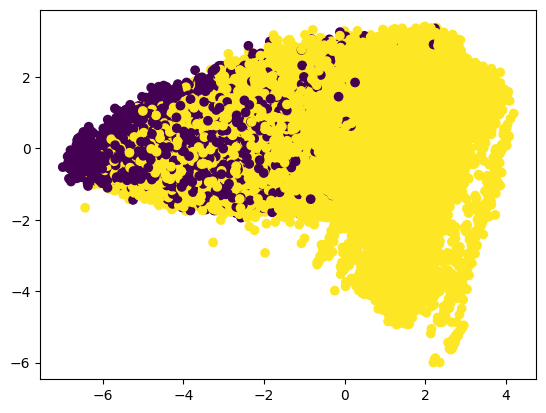

In [ ]:
plt.scatter(x_pca[:,0], x_pca[:,1], c=y)